# **Statistics** _Day 64_

## Statistical Tests 
##### Name: Muhammad Hassaan
##### Date: March 17, 2024
##### Email: muhammadhassaan7896@gmail.com

In [1]:
# import libraries
import pandas as  pd
import numpy as np 
import  matplotlib.pyplot as plt
import seaborn as sns 
import  plotly.express as px
from scipy import stats

In [2]:
# import data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# **1. Chi-Squared Test**
(categorical value)

`Null Hypothesis:` There is no significant association between gender ('sex') and survival ('survived') on the Titanic. This means any observed differences in survival rates between genders in the dataset are due to chance and not due to an underlying relationship.

`Alternative Hypothesis:` There is a significant association between gender ('sex') and survival ('survived') on the Titanic. This implies that the differences in survival rates are not just due to chance but are influenced by the passengers' gender.

In [3]:
# create a contigency table
contigency_table = pd.crosstab(df['sex'], df['survived'])
contigency_table

survived,0,1
sex,,
female,81,233
male,468,109


In [4]:
# perform chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

# print the results
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print(f"Expected:\n {expected}")

Chi-square statistic: 260.71702016732104
p-value: 1.1973570627755645e-58
Degrees of freedom: 1
Expected:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


As the p_value in this test is `P-value: 1.1973570627755645e-58` which is far less than `0.05`, we reject the null hypothesis.

---
# **2. Normal Distribution Test** 
(numerical data)

---

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

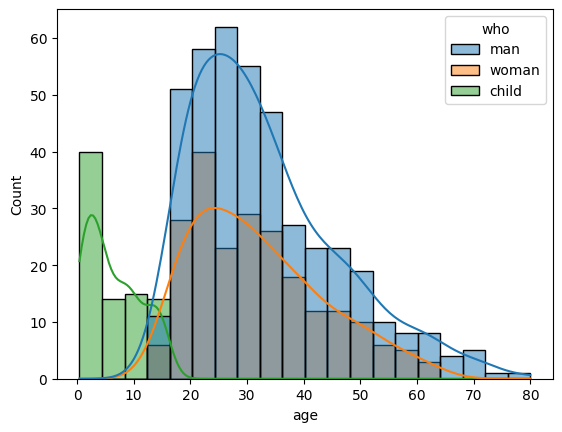

In [6]:
# graphical Method
sns.histplot(data=df, x='age', hue='who', kde=True)

`Shapiro Wilk` Test on Normal Distribution Gaussian Distribution\
`Null Hypothesis:` The data is normally distributed.\
`Alternative Hypothesis:` Data is not normally distributed.

In [7]:
# shapiro wilk test 
statistics, p = stats.shapiro(df['age'])

# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample does not look Gaussian/Normally Distributed (reject H0)')

p-value: 1.0, Sample looks Gaussian/Normally Distributed (fail to reject H0)


<Axes: xlabel='fare', ylabel='Count'>

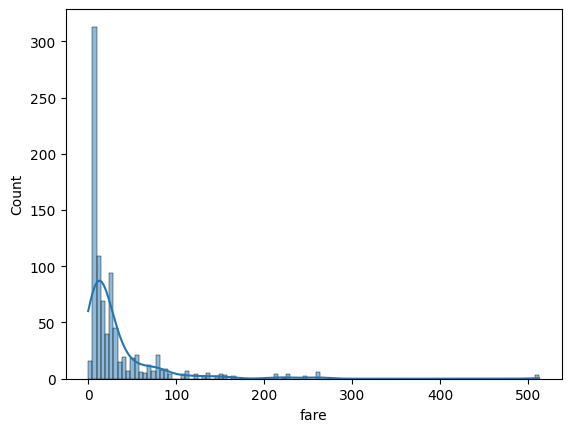

In [8]:
# graphical Method
sns.histplot(data=df, x='fare',  kde=True)

In [9]:
# shapiro wilk test 
statistics, p = stats.shapiro(df['fare'])

# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample does not look Gaussian/Normally Distributed (reject H0)')

p-value: 1.0840444395829658e-43, Sample does not look Gaussian/Normally Distributed (reject H0)


---
# **3. t-Test**
---

1. One-sample t-Test

In [10]:
import scipy.stats as stats

# sample data 
x = [1, 2, 3, 4, 5] 

# known publications mean
mu = 3

# peform one sample t-test
t_statistics, p = stats.ttest_1samp(x, mu)

# print results
print('t-statistics:', t_statistics)
print('p-value:', p)

t-statistics: 0.0
p-value: 1.0


In [11]:
#print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample mean is equal to population mean (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample mean is not equal to population mean (reject H0)')

p-value: 1.0, Sample mean is equal to population mean (fail to reject H0)


---
2. Two Sample T-test (independent)
---

In [12]:
# sample data
group1 = [2.3, 3.4, 4.5, 2.3, 3.4]
group2 = [1.2, 2.2, 3.2, 2.2, 2.3]

# perform independent two-sample t-test
t_stat, p = stats.ttest_ind(group1, group2, equal_var=True)

print("t-statistic:", t_stat)
print("p-value:", p)

if p > 0.05:
    print(f'p-value: {p}, group1 mean is equal to group2 mean (fail to reject H0)')
else:
    print(f'p-value: {p}, group1 mean is not equal to group2 mean (reject H0)')

t-statistic: 1.8482055087756457
p-value: 0.10175647371829195
p-value: 0.10175647371829195, group1 mean is equal to group2 mean (fail to reject H0)


---
3. Paired Sample t-test
---

In [13]:
# sample data
before = [2, 3, 4, 5, 6]
after = [3, 4, 5, 6, 7]

# perform paired sample t-test
t_stat, p_val = stats.ttest_rel(before, after)

print("t-statistic:", t_stat)
print("p-value:", p_val)

# print the results using if else conditions
if p_val > 0.05:
    print(f'p-value: {p_val}, before mean is equal to after mean (fail to reject H0)')
else:
    print(f'p-value: {p_val}, before mean is not equal to after mean (reject H0)')

t-statistic: -inf
p-value: 0.0
p-value: 0.0, before mean is not equal to after mean (reject H0)


c:\Users\muham\miniconda3\envs\python_eda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


---
# **Test for Homogeniety**
---

# **1. Levene's Test**

In [14]:
# sample data
group1 = [2.3, 3.4, 4.5, 2.3, 3.4]
group2 = [1.2, 2.2, 3.2, 2.2, 2.3]

# perform independent two-sample t-test
w_stat, p_val = stats.levene (group1, group2)

print("w-statistic:", w_stat)
print("p-value:", p_val)

w-statistic: 0.44651162790697696
p-value: 0.5228039334796065


In [15]:
# print the results using if else conditions
if p_val > 0.05:
    print(f'p-value: {p_val}, Variance are equal (fail to reject H0)')
else:
    print(f'p-value: {p_val}, Variance are not equal (reject H0)')

p-value: 0.5228039334796065, Variance are equal (fail to reject H0)


---
# **2. Bartlett's Test**
---

In [16]:
# sample data
group1 = [2.3, 3.4, 4.5, 2.3, 3.4]
group2 = [1.2, 2.2, 3.2, 2.2, 2.3]

# perform independent two-sample t-test
w_stat, p_val = stats.bartlett(group1, group2)

print("w-statistic:", w_stat)
print("p-value:", p_val)

# print the results using if else conditions
if p_val > 0.05:
    print(f'p-value: {p_val}, Variance are equal (fail to reject H0)')
else:
    print(f'p-value: {p_val}, Variance are not equal (reject H0)')

w-statistic: 0.24050679805097827
p-value: 0.6238403179343277
p-value: 0.6238403179343277, Variance are equal (fail to reject H0)


---
# **ANOVA**
---

In [17]:
# sample data
a = [2.3, 3.4, 4.5, 2.3, 3.4]
b = [1.2, 2.2, 3.2, 2.2, 2.3]
c = [2.2, 3.5, 4.7, 2.7, 4.1]

# perform one way ANOVA
f_stat, p_val = stats.f_oneway(a, b, c)

print("f-statistic:", f_stat)
print("p-value:", p_val)

# print the results using if else conditions
if p_val > 0.05:
    print(f'p-value: {p_val}, Means are equal (fail to reject H0)')
else:
    print(f'p-value: {p_val}, Means are not equal (reject H0)')

f-statistic: 2.605805637358014
p-value: 0.11485722056512937
p-value: 0.11485722056512937, Means are equal (fail to reject H0)
